# Titanic Dataset Investigation

## Introduction
This Jupyter Notebook investigates the Titanic dataset provided by Kaggle. 

The objective of this investigation is to determine chances of survival of a passenger based on the given attributes:
  * Age
  * Gender
  * Siblings aboard
  * Parents aboard
  
This investigation therefore answers the following question:
_"How likely a passenger would survive, based on his / her age, gender and number of siblings and / or parents aboard"_

To begin with, the dataset is loaded into a Pandas Dataframe, and its first few records are viewed.

In [1]:
import csv
import pandas as pd
titanic_df = pd.read_csv('titanic.csv', quoting=csv.QUOTE_MINIMAL, skiprows=[0],
                         names=['passenger_id', 'survived', 'class', 'name', 'sex', 'age',
                                'n_siblings', 'n_parents', 'ticket_id', 'fare', 'cabin', 'port'])
titanic_df.head()

,passenger_id,survived,class,name,sex,age,n_siblings,n_parents,ticket_id,fare,cabin,port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling
To begin with, attributes that are not considered in the investigation (`passenger_id`, `name`, `titcket_id`, `fare`, `cabin` and `port`) can be removed from the dataset.

In [2]:
titanic_df = titanic_df.drop(['passenger_id', 'name', 'ticket_id', 'fare', 'cabin', 'port'], axis=1)
titanic_df.head()

,survived,class,sex,age,n_siblings,n_parents
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


Next, to ensure that the data set is ready for analysis, check whether any attributes have missing values.

In [3]:
titanic_df['survived'].isnull().sum()

0

In [4]:
titanic_df['age'].isnull().sum()

177

In [5]:
titanic_df['sex'].isnull().sum()

0

In [6]:
titanic_df['n_siblings'].isnull().sum()

0

In [7]:
titanic_df['n_parents'].isnull().sum()

0

The `age` attribute seems to have missing values; `177` to be exact. These missing values could be ignored during the analysis.

In [8]:
titanic_df = titanic_df[titanic_df['age'].notnull()]
titanic_df['age'].isnull().sum()

0

## Survivors
The dataset provides details of passengers aboard Titanic, and wether or not they survived. Objective of this investigation is to determine chances of survival of a passenger based on their age, sex, class, number of siblings and parents aboard. Survivors are identified using `survived` attribute with values `0` and `1`, representing non survivors and survivors respectively.

### Survival based on Age

In [9]:
survivors = titanic_df.groupby('survived')['age']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: age, dtype: object

/home/aliasm2k/Public/.virtualenv/titanic/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


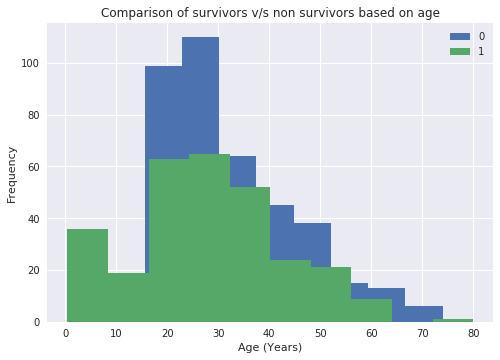

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.title('Comparison of survivors v/s non survivors based on age')
survivors.plot(kind='hist', legend=True)

From the results it can be concluded that age is not a determining factor for survival as the shape of the histogram is almost the same for both survivors and non survivors with the exception of children. It is interesting to note that all passengers under age 16 (approximately) survived.

### Survival based on Gender

In [11]:
survivors = titanic_df.groupby('survived')['sex']
survivors.describe()

,count,unique,top,freq
survived,,,,
0,424,2,male,360
1,290,2,female,197


From the table, it can be concluded that more males survived than females. But this is not a determining factor as there was more males aboard than females.

### Survival based on Class

In [12]:
survivors = titanic_df.groupby('survived')['class']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,2.485849,0.743633,1.0,2.0,3.0,3.0,3.0
1,290.0,1.872414,0.836617,1.0,1.0,2.0,3.0,3.0


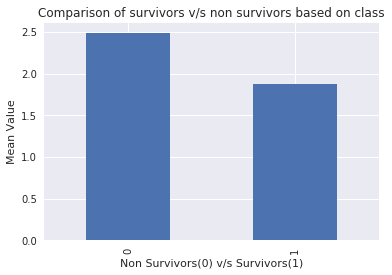

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

survivors = survivors.mean()
survivors.plot(kind='bar')
plt.xlabel('Non Survivors(0) v/s Survivors(1)')
plt.ylabel('Mean Value')
plt.title('Comparison of survivors v/s non survivors based on class')

From the results, it can be concluded that first and second class passengers had higher chances of survival than third class passengers.

### Survival based on Number of Siblings aboard

In [14]:
survivors = titanic_df.groupby('survived')['n_siblings']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,0.525943,1.044760,0.0,0.0,0.0,1.0,5.0
1,290.0,0.493103,0.731132,0.0,0.0,0.0,1.0,4.0


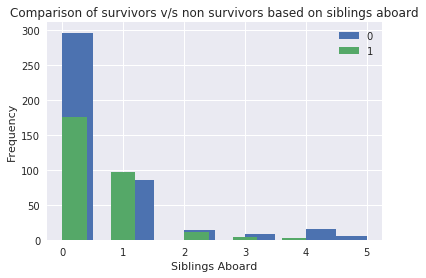

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

survivors.plot(kind='hist', legend=True)
plt.xlabel('Siblings Aboard')
plt.title('Comparison of survivors v/s non survivors based on siblings aboard')

From the results, it can be concluded that chances of survival was high for passengers having siblings aboard with them, compared to passengers having no siblings aboard with them. The graph clearly shows that passengers with siblings aboard survived compared to passengers with no siblings aboard.

### Survival based on Parents aboard

In [16]:
survivors = titanic_df.groupby('survived')['n_parents']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,0.365566,0.878341,0.0,0.0,0.0,0.0,6.0
1,290.0,0.527586,0.807147,0.0,0.0,0.0,1.0,5.0


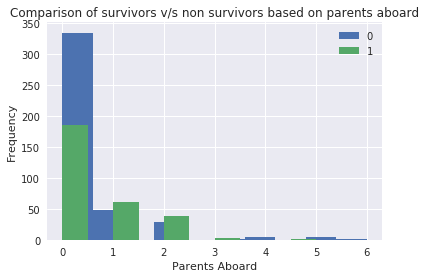

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

survivors.plot(kind='hist', legend=True)
plt.xlabel('Parents Aboard')
plt.title('Comparison of survivors v/s non survivors based on parents aboard')

From the results it can be concluded that passengers with parents aboard had higher chances of survival than passengers without parents aboard with them. The graph clearly shows that passengers with either one or both of their parents survived; whereas many passengers without their parents aboard didn't survive.

## Limitations
This investigation of the given dataset had the following limitations:
  * __Missing values__, as in case of age:
  Grouping dataset based on survivors gives 424 for non survivors and 290 for survivors compared to 342 for survivors and 549 for non survivors in case of other attributes; clearly indicating some missing values.
  * __Correlated values__, as in case of parents aboard:
  The attributes, parents aboard and age are correlated. Passengers below age 16 have all survived, and were all accompanied by their parents (or nannies).
  * __Ambigious values__, as in case of parents aboard:
  From the graph, the parents aboard attribute seems to have values 3, 4, 5 and 6; which is ambigous. 
  * __Exceptional values__, as in case of siblings aboard:
  Although analysys concludes that chances of survival are high in case of passengers with siblings, it is not true in case of passengers with multiple siblings aboard.

## Conclusion
From the analysis, it can be concluded that factors that determines a passengers survival based on the given dataset are:
  * Class the passenger is travelling
  * Number of siblings aboard with the passenger
  * Wether or not parents the passenger was accompanied by parents

However, factors that don't determine a passengers chances of survival are:
  * Age of the passenger
  * Gender of the passenger
  
These conclusions are however not final due to presence of correlated, missing, ambigious and exceptional values in the dataset.